In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [6]:
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(["./Records/test.tfrecords"])
_,serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(
    serialized_example,
    features={
        'image_raw':tf.FixedLenFeature([],tf.string),
        'pixels':tf.FixedLenFeature([],tf.int64),
        'label': tf.FixedLenFeature([],tf.int64),
        
    })
images = tf.decode_raw(features['image_raw'],tf.uint8)
labels = tf.cast(features['label'],tf.int32)

In [7]:
sess = tf.Session()

# 启动多线程处理输入数据。
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess,coord=coord)

Tensor("Cast_1:0", shape=(), dtype=int32)


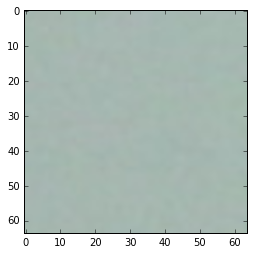

[169 186 180 ..., 165 185 176]
0 2


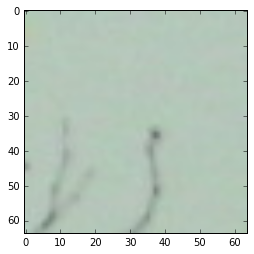

[181 205 189 ..., 176 197 178]
14 2


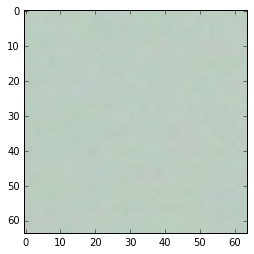

[187 203 192 ..., 184 205 190]
28 2


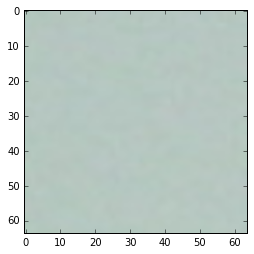

[180 200 191 ..., 180 197 191]
42 2


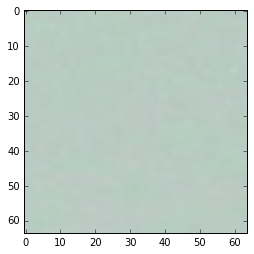

[187 204 196 ..., 184 206 194]
56 2


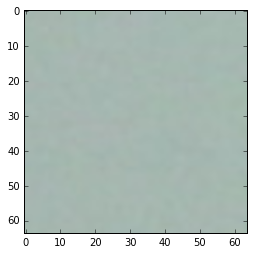

[169 186 180 ..., 165 185 176]
70 2


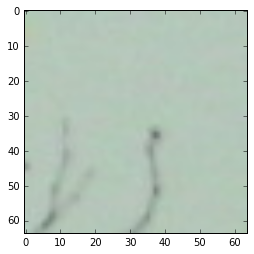

[181 205 189 ..., 176 197 178]
84 2


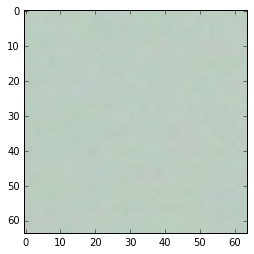

[187 203 192 ..., 184 205 190]
98 2


In [12]:
print labels
for i in range(100):
    if i%14==0:
        image,lable = sess.run([images,labels])
        plt.imshow(image.reshape(64,64,3))
        plt.show()
        print image
        print i,lable


In [13]:
min_after_dequeue = 10000
batch_size = 100
capacity = min_after_dequeue + 3 * batch_size

image_batch, label_batch = tf.train.shuffle_batch([images, labels], 
                                                    batch_size=batch_size, 
                                                    capacity=capacity, 
                                                    min_after_dequeue=min_after_dequeue)

ValueError: All shapes must be fully defined: [TensorShape([Dimension(None)]), TensorShape([])]